# DCSM-FM 3D

In [1]:
#data
import xarray as xr
import numpy as np 
import zarr
#plotting
import matplotlib.pyplot as plt 
%matplotlib widget
plt.rcParams['figure.figsize'] = [7, 5]
# gui elements
import ipywidgets as widgets
#from ipyleaflet import *

from wtcore.variables import *
from wtcore.widgets import *
from wtcore.plots import *

In [2]:
map_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/DCSM-FM-3D_map.zarr"
#map_url="../DCSM-FM-3D_map.zarr"
map=xr.open_zarr(map_url,consolidated=True)
# map.salinity

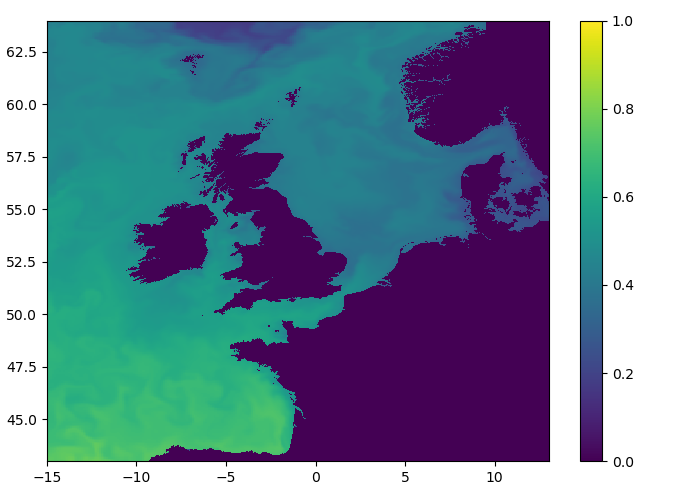

In [3]:
class MyPlot1(wtPlot):
    def __init__(self,map,variables,*args,**kwargs):
        super().__init__(variables,*args,**kwargs)
        #expand here with your own data
        self.map = map
        itime=self.variables[0].value
        ax=self.ax
        fig=self.fig
        self.update(itime) # fore a first time drawing
        pc=self.pc
        fig.colorbar(pc,ax=ax) #TODO only steal space for colorboar once

    def redraw(self):
        ax=self.ax
        fig=self.fig
        ivartype=self.variables[0].value # time-step is first variable
        itime=self.variables[1].value # time-step is first variable
        ilayer=self.variables[2].value # time-step is second variable
        xs = self.map.x_center
        ys = self.map.y_center
        zs = self.map.z_center_3d
        self.pc=None
        if ivartype==0:
            temp = map.temperature.isel(time=itime,z=ilayer) #select part of the data
            pc = ax.pcolormesh(xs,ys,temp,vmin=0,vmax=20) 
        else:
            sal = map.salinity.isel(time=itime,z=ilayer) #select part of the data
            pc = ax.pcolormesh(xs,ys,sal,vmin=20,vmax=35) 
            self.pc=pc

# Variables and buttons
ivartype=ListVariable("vartype","Quantity",["Temperature","Salinity"])
ivartype_lst=WtListDropdown(ivartype)
itime=IntVariable("itime","time-step",0,len(map.time),0) #define variable
itime_sld=WtIntSlider(itime) # add a control widget
ilayer=IntVariable("ilayer","layer",0,len(map.z),len(map.z)-1)
ilayer_sld=WtIntSlider(ilayer)

# Plots
p1=MyPlot1(map,[ivartype,itime,ilayer]) #create plot linked to variables

# Layout and start
bottom_widgets=widgets.HBox([ivartype_lst,itime_sld,ilayer_sld])
top_widgets= p1
gui=widgets.VBox([bottom_widgets,top_widgets]) #stack the parts
display(gui)

In [ ]:
fig, ax = plt.subplots()
ff = ax.pcolormesh(np.random.randn(10,10),vmin=-2,vmax=2) 
fig.tight_layout()
fig.canvas.header_visible = False
fig.colorbar(ff,ax=ax)


In [ ]:
p1.pc